This notebook will sift through arrest data on the Pittsburgh police in order to find which neighborhoods had the least arrests.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import copy

arrest_data = pd.read_csv("arrest-data.csv")


I cleaned the dataframe, removing a bunch of extraneous columns

In [3]:
arrest_data = arrest_data.drop(columns=["PK", "CCR", "AGE", "GENDER", "RACE", "ARRESTTIME", "ARRESTLOCATION", "OFFENSES", "INCIDENTLOCATION", "INCIDENTZONE", "INCIDENTTRACT", "COUNCIL_DISTRICT", "PUBLIC_WORKS_DIVISION", "X", "Y"])
print(arrest_data)

         _id       INCIDENTNEIGHBORHOOD
0          1                 Bloomfield
1          2               Outside City
2          3                   Westwood
3          4             East Allegheny
4          5            Crafton Heights
...      ...                        ...
66466  88204  Central Business District
66467  88205                  Shadyside
66468  88206                  Knoxville
66469  88207                 Manchester
66470  88234                        NaN

[66471 rows x 2 columns]


After getting the only important column I need, I must drop the None-value columns and sort all Neighborhoods into a dictionary to find their frequencies

In [4]:
arrest_data = arrest_data.dropna()
frequencies = dict()
for index, row in arrest_data.iterrows():
  if row['INCIDENTNEIGHBORHOOD'] in frequencies:
    frequencies[row['INCIDENTNEIGHBORHOOD']] += 1
  else:
    frequencies[row['INCIDENTNEIGHBORHOOD']] = 0

After sorting it into a dictionary and getting rid of many of the most crime-ridden neighborhoods, I then used matplotlib to visualize the frequencies

{'Regent Square': 36, 'East Carnegie': 47, 'Golden Triangle/Civic Arena': 82, 'Central Northside': 22, 'Troy Hill-Herrs Island': 5, 'Glen Hazel': 168, 'Outside County': 56, 'Upper Lawrenceville': 188, 'Polish Hill': 165, 'Fairywood': 126, 'Morningside': 187, 'Friendship': 173, 'Oakwood': 81, 'Allegheny West': 128, 'St. Clair': 54, 'Esplen': 199, 'Mt. Oliver Neighborhood': 1, 'Summer Hill': 75, 'Arlington Heights': 154, 'Mount Oliver': 123, 'Windgap': 123, 'Outside State': 66, 'Duquesne Heights': 190, 'New Homestead': 38, 'Ridgemont': 36, 'Swisshelm Park': 42, 'Hays': 119, 'Chartiers City': 45, 'Mt. Oliver Boro': 17}


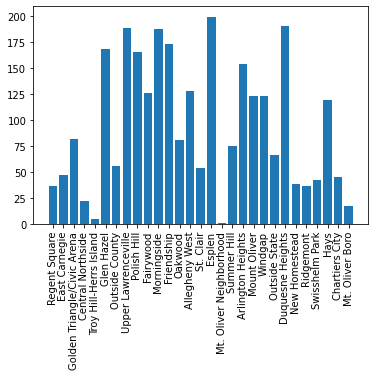

In [5]:
new_frequencies = copy.deepcopy(frequencies)
for key, val in frequencies.items():
  if val > 200:
    new_frequencies.pop(key)
print(new_frequencies)
names = list(new_frequencies.keys())
values = list(new_frequencies.values())

plt.bar(range(len(new_frequencies)), values, tick_label=names)
plt.xticks(rotation='vertical')
plt.show()